In [1]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

2024-07-04 22:07:14.067710: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 22:07:14.068229: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 22:07:14.071047: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 22:07:14.102242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 22:07:14.826718: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
def plot_lcurve(l_curve,loglog=False):
    # Plot
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

    # Plot line connecting the points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

    # Annotate points with regularization values
    for i, txt in enumerate(l_curve['reg']):
        plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

    plt.xlabel('E')
    plt.ylabel('R')
    plt.title('Log-Log Plot of E vs R with Regularization Constants')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
variable = 'simultaneous'

#### Thwaites L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='data/geojson/thwaites.geojson', mesh='thwaites', invert_iter = 170, workers = 2,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6], regularization_grad_fcn = True, constant_val=0.01)

In [5]:
data = {
    'reg': [0.01, 0.1, 1, 10],
    'J1': [568.5430921059252, 200.15193884090579, 125.05111469154097, 131.02607789480362],
    'J2': [0.029821845834902418, 0.5584096178962419, 10.077985527278557, 16.01170699159037]
}

l_curve = pd.DataFrame(data)
l_curve = l_curve.sort_values('reg')
l_curve

l_curve = pd.DataFrame(data)

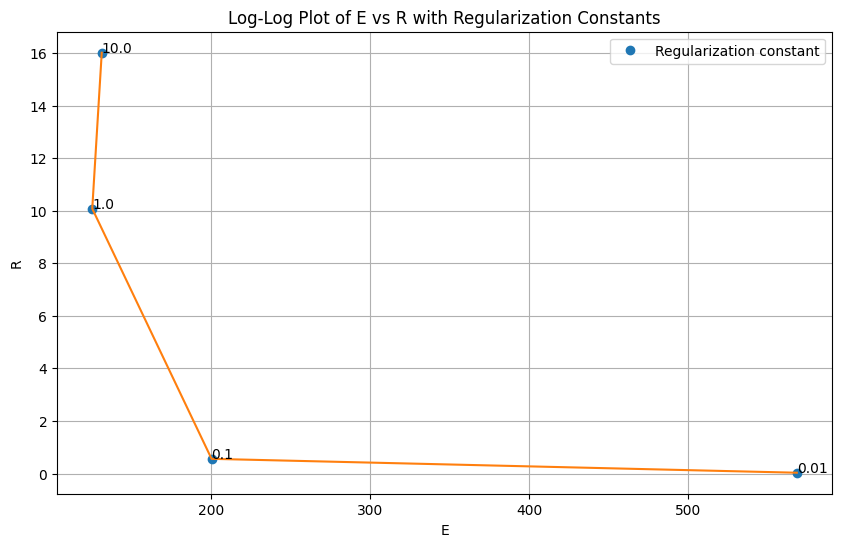

In [8]:
plot_lcurve(l_curve, loglog=False)

#### Dotson L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='data/geojson/dotson-crosson.geojson', mesh='dotson', invert_iter = 300, workers = 2,  lcar=10e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6,7,8,9,10,11], regularization_grad_fcn = True, constant_val=0.01)

In [6]:
data = {
    'reg': [0.01, 0.1, 1, 100],
    'J1': [1940.0857585219212, 552.5697993920149, 260.4363104810728, 224.77324734206692],
    'J2': [0.08833021365283901, 1.8275757046578123, 45.85306601609634, 323.2068724742969]
}

l_curve = pd.DataFrame(data)
l_curve


,reg,J1,J2
0,0.01,1940.085759,0.088330
1,0.10,552.569799,1.827576
2,1.00,260.436310,45.853066
3,100.00,224.773247,323.206872


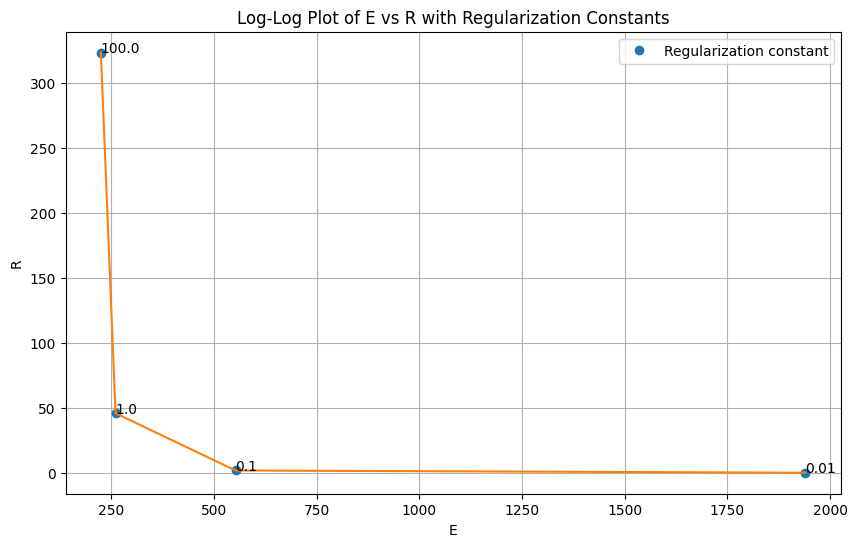

In [7]:
plot_lcurve(l_curve, loglog=False)